# DEEP LEARNING

No  mundo  moderno,  somos  banhados  por  um  oceano  de  dados.  A  cada segundo,   uma   quantidade   exorbitante   de   informações   é   gerada,   capturada   e compartilhada   em   todas   as   esferas   da   nossa   sociedade   digitalizada.   Desde transações  comerciais  até  interações  em  redes sociais,  passando  por  registros médicos e dispositivos de IoT, os dados fluem incessantemente, inundando nossos sistemas de armazenamento e desafiando nossa capacidade de compreensão.

**como lidar com essa avalanche de dados e transformá-la em conhecimento acionável?**

**É aqui que o Deep Learning(DL) entra em cena, oferecendo promessas de descobertas revolucionárias em um mundo inundado de dados**

Deep  Learning(DL)  (Aprendizado  Profundo) é  uma  subárea  do  campo  de Inteligência Artificial(IA) que se concentra no treinamento de modelos de Machine Learning (ML)  (Aprendizado de Máquina)  em  conjuntos  de  dados  muito  grandes e complexos.

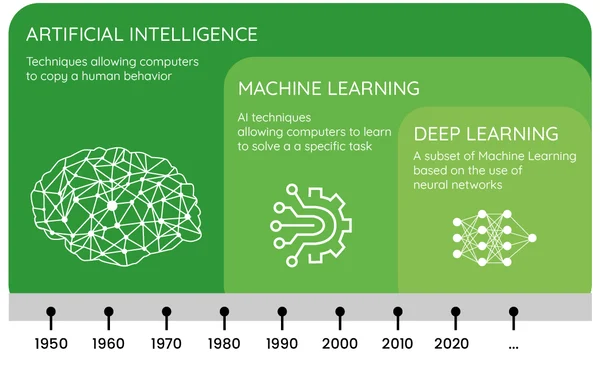

**Rede Neural**

Uma rede neural é um modelo computacional inspirado no cérebro humano, usado em inteligência artificial para processar dados, reconhecer padrões e realizar tarefas complexas. Ela funciona com nós interconectados (neurônios) organizados em camadas, onde cada conexão tem um peso que é ajustado durante o treinamento para refinar o desempenho do sistema.

Os  modelos  de  aprendizado  de  máquina  que  servem  de  base  para  o Deep Learning (DL) são Redes Neurais Artificiais(RNAs).A principal diferença entre o DL e as RNAs,   é   que   o   DL   emprega diversas camadas   ocultas para   aprender representações e correlações dos dados


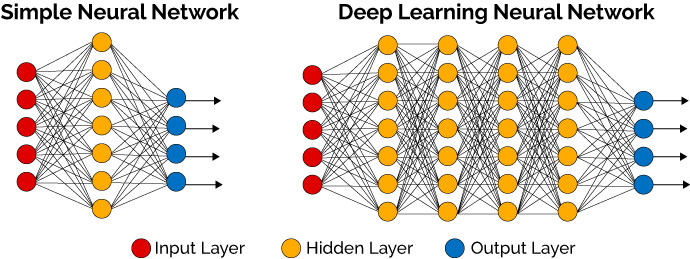

Ao  contrário  de  métodos  tradicionais  de  aprendizado  de  máquina,  que dependem  de  características  cuidadosamente  projetadas  e  extraídas  manualmente dos   dados,   o Deep   Learning aprende automaticamente   representações hierárquicas a partir de dados brutos

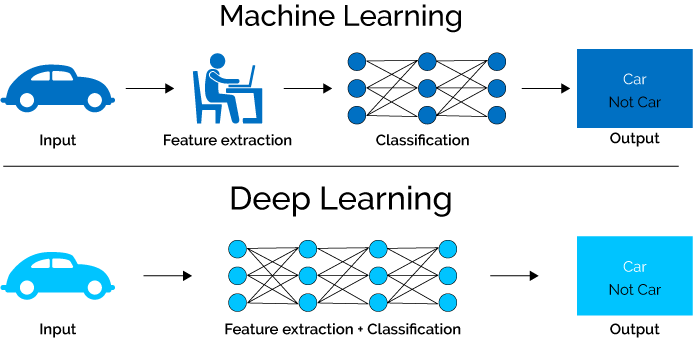

# DEEP LEARNING PARA CLASSIFICAÇÃO DE IMAGENS

https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

Utilizaremos a base “Fashion MNIST” já persistida no TensorFlow. Criada por Zalando  (uma  empresa  de  e-commerce  europeia),  essa  base é  uma  coleção  de imagens  de  artigos  de  moda,  composta por  70.000  imagens, divididas em um conjunto de treinamento de 60.000 imagens e um conjunto de teste de  10.000  imagens. .

 Cada  imagem  tem  uma  resolução  de  28x28  pixels  e  está associada a um label de uma das 10 classes, representando diferentes tipos de roupas e  acessórios.

**O  objetivo é  criar  um  modelo  preditivo  baseado  em  rede  neural  que possa classificar corretamente as imagens em suas respectivas categorias.**

In [ ]:
# ======= Bibliotecas Básicas =======
import numpy as np
import matplotlib.pyplot as plt

# ======= Bibliotecas deep learning =======
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# dataset

fashion_mnist = keras.datasets.fashion_mnist


In [ ]:
# treino e teste

(imagens_treino,rotulo_treino), (imagens_teste,rotulo_teste) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# explorar esses dados

imagens_treino.shape

(60000, 28, 28)

In [ ]:
len(rotulo_treino)

60000

In [ ]:
rotulo_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = [
"T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

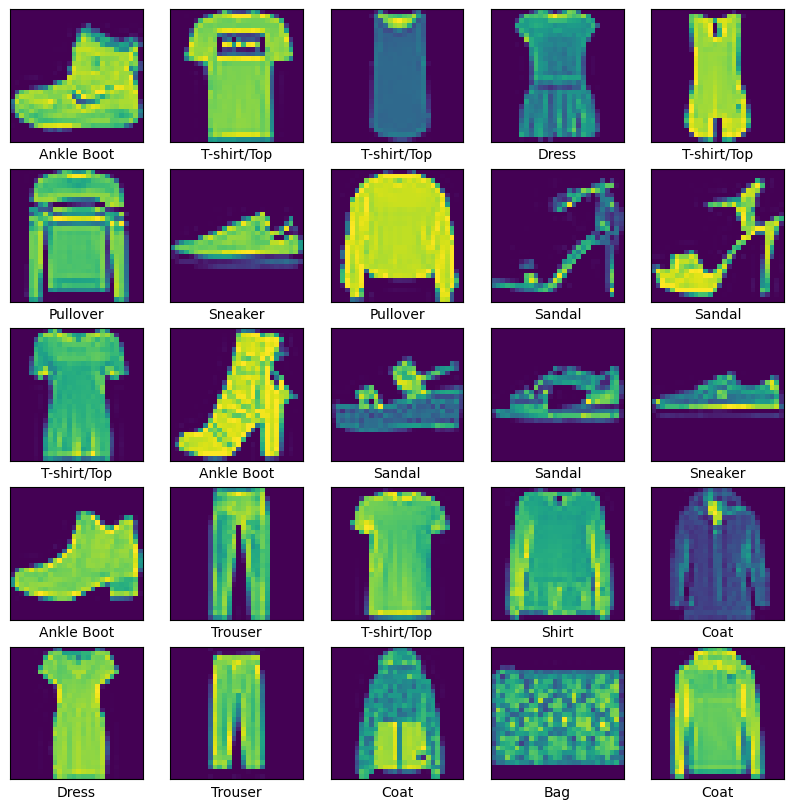

In [ ]:
# Exibir algumas imagens

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagens_treino[i])
  plt.xlabel(class_names[rotulo_treino[i]])
plt.show()

In [ ]:
# Normalização !!!

imagens_treino = imagens_treino/255
imagens_teste = imagens_teste/255

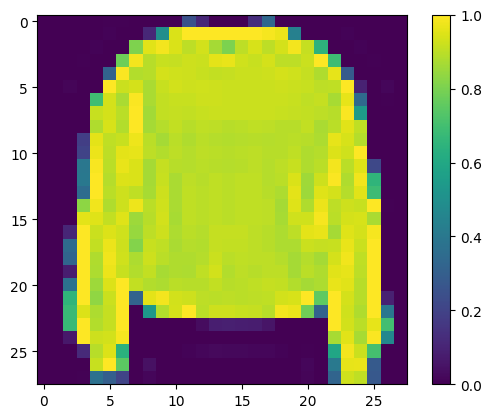

In [ ]:
plt.figure()
plt.imshow(imagens_treino[7])
plt.colorbar()
plt.show()

**CRIAÇÃO DO MODELO DE DL**

In [ ]:
# MLP (Multi Layer Perceptron)
modelo = keras.Sequential([
                            layers.Flatten(input_shape = (28,28)), #784
                            layers.Dense(128, activation='relu'),
                            layers.Dropout(0.2),
                            layers.Dense(10, activation='softmax')
])

# compilação

modelo.compile(
                optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Treinamento

treinamento = modelo.fit(
                          imagens_treino, rotulo_treino,
                          epochs = 10,
                          validation_split = 0.2,
                          batch_size = 32

)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7533 - loss: 0.7069 - val_accuracy: 0.8466 - val_loss: 0.4158
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8489 - loss: 0.4161 - val_accuracy: 0.8538 - val_loss: 0.3925
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8625 - loss: 0.3779 - val_accuracy: 0.8733 - val_loss: 0.3559
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8735 - loss: 0.3469 - val_accuracy: 0.8738 - val_loss: 0.3490
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8774 - loss: 0.3354 - val_accuracy: 0.8755 - val_loss: 0.3400
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8788 - loss: 0.3285 - val_accuracy: 0.8801 - val_loss: 0.3316
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8840 - loss: 0.3135 - val_accuracy: 0.8792 - val_loss: 0.3321
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8867 - loss: 0.3053 - 

In [ ]:
# Avaliação (Acurácia e Perda/Loss)

perda, acuracia = modelo.evaluate(imagens_teste, rotulo_teste)
print(f"A acurácia é: {acuracia:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3424
A acurácia é: 0.8776


<function matplotlib.pyplot.show(close=None, block=None)>

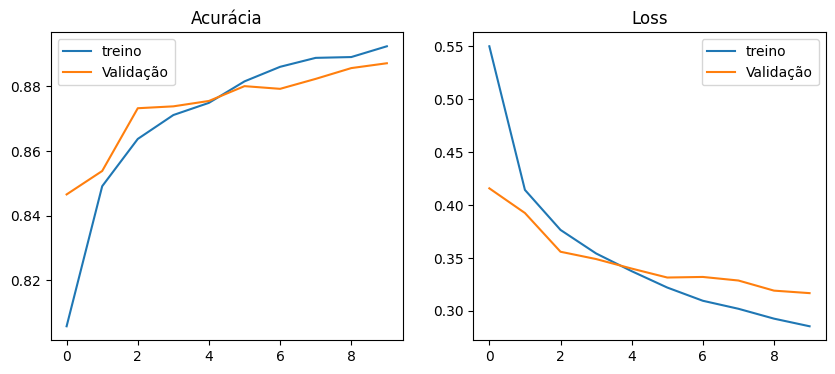

In [ ]:
# Curva de treinamento

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(treinamento.history['accuracy'], label= 'treino')
plt.plot(treinamento.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(treinamento.history['loss'], label= 'treino')
plt.plot(treinamento.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()
plt.show

**MATRIZ DE CONFUSÃO**

In [ ]:
predicao = modelo.predict(imagens_teste)

matriz = tf.math.confusion_matrix(rotulo_teste, predicao.argmax(axis = 1))

print(matriz)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
tf.Tensor(
[[798   2  16  16   4   0 153   0  11   0]
 [  3 970   3  19   2   0   1   0   2   0]
 [ 12   1 780  10  92   0 103   0   2   0]
 [ 19   7   7 885  34   0  44   0   4   0]
 [  0   1  88  34 777   0 100   0   0   0]
 [  0   0   0   0   0 959   0  26   2  13]
 [102   1  82  24  46   0 729   0  16   0]
 [  0   0   0   0   0  17   0 951   1  31]
 [  5   0   3   3   3   2   9   4 971   0]
 [  1   0   0   1   0   7   0  35   0 956]], shape=(10, 10), dtype=int32)


In [ ]:
import scipy
scipy.interp = np.interp

In [ ]:
#IMPORTANDO O SCILIK PLOT
! pip install scikit-plot
import scikitplot as skplt

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

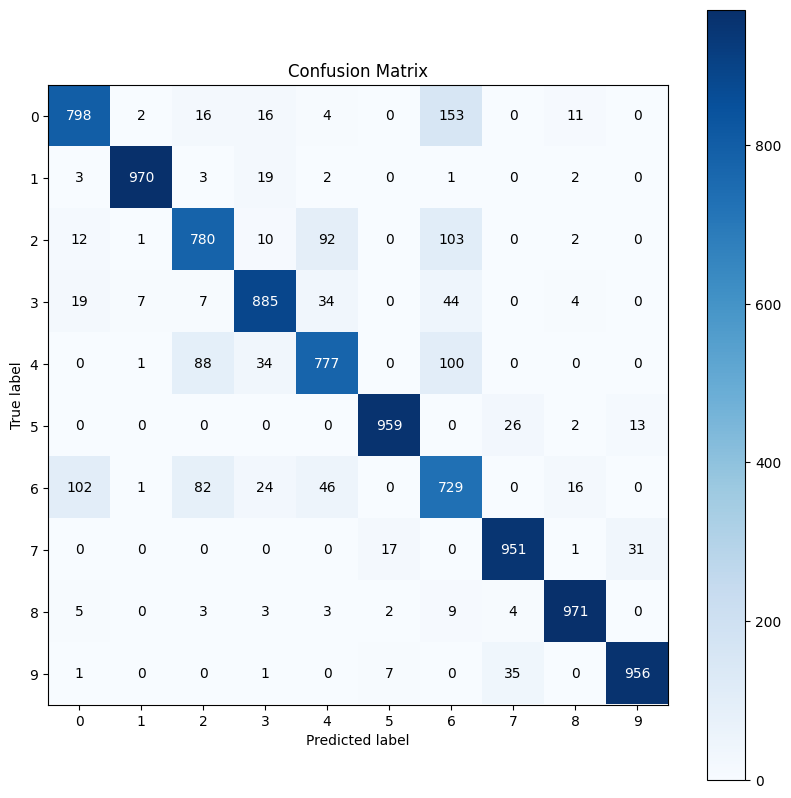

In [ ]:
skplt.metrics.plot_confusion_matrix(rotulo_teste, predicao.argmax(axis = 1), figsize = (10,10))

In [ ]:
#EXTRAÇÃO DE MÉTRICAS IMPORTANTES
from sklearn.metrics import classification_report
print(classification_report(rotulo_teste, predicao.argmax(axis = 1)))

#PRECISION = MOSTRA QUANDO O MODELO PREVE X SE ELE ACERTA (ex. QUANDO ELE PREVE O ZERO (TSHIRT) ELE ACERTA 77%)
#RECALL = TUDO QUE TEM NA BASE DE DADOS, O QUANTO ELE ENCONTROU DE TSHIRT (LEVANDO EM CONSIDERAÇÃO OS NUMEROS AO LADO ESQUERDO)
#F1-SCORE = PONDERAÇÃO ENTRE A PRECISÃO E O RECALL
#SUPPORT = REPRESENTA QUANTOS MODELOS FORAM APRESENTADOS

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.78      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.64      0.73      0.68      1000
           7       0.94      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

